In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("ecomm.data.csv")
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

In [4]:
df.Category.unique()

array(['Electronics', 'Beauty', 'Sports', 'Home & Garden', 'Clothing'],
      dtype=object)

In [5]:
df = df.dropna(subset=['Price']) #Drop null values to have data clean
df = df.loc[df.QuantitySold>0] #Drop values where the solds where negative
df.loc[df['Promotion'] == 'No', 'Discount'] = 0 #If promotion is NO the discount is 0

In [6]:
df['TotalSale'] = df['QuantitySold'] * df['Price'] # Calculate the totale sale of the order
df['TotalDiscount'] = df['Discount'] * df['TotalSale'] / 100 # Calculate the totale sale of the order

In [7]:
# Assuming 'df' is the DataFrame you provided
# Ensure PurchaseDate is in datetime format
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Extract the year and month from the PurchaseDate
df['Year'] = df['PurchaseDate'].dt.year
df['Month'] = df['PurchaseDate'].dt.month

# Combine Year and Month into a single column for grouping
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

# Group by Year_Month and calculate the sum of TotalSale and QuantitySold
monthly_sales_total = df.groupby('Year_Month')['TotalSale'].sum().reset_index()
monthly_sales_quantity = df.groupby('Year_Month')['QuantitySold'].sum().reset_index()

# Plotting TotalSale
fig_total_sale = px.line(monthly_sales_total, x='Year_Month', y='TotalSale', title='Seasonality of Total Sales by Year and Month', markers=True)
fig_total_sale.update_layout(xaxis_title='Year-Month', yaxis_title='Total Sale', xaxis=dict(tickmode='linear', type='category'))
fig_total_sale.show()

# Plotting QuantitySold
fig_quantity_sold = px.line(monthly_sales_quantity, x='Year_Month', y='QuantitySold', title='Seasonality of Quantity Sold by Year and Month', markers=True)
fig_quantity_sold.update_layout(xaxis_title='Year-Month', yaxis_title='Quantity Sold', xaxis=dict(tickmode='linear', type='category'))
fig_quantity_sold.show()

In [8]:
# Seasonal decomposition
decomposition = seasonal_decompose(monthly_sales_total['TotalSale'], model='additive', period=6)  # Assuming annual seasonality

# Plotting the components (trend, seasonal, residual)
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_sales_total['Year_Month'], y=decomposition.trend, mode='lines', name='Trend'))
fig.add_trace(go.Scatter(x=monthly_sales_total['Year_Month'], y=decomposition.seasonal, mode='lines', name='Seasonal'))
fig.add_trace(go.Scatter(x=monthly_sales_total['Year_Month'], y=decomposition.resid, mode='lines', name='Residual'))
fig.add_trace(go.Scatter(x=monthly_sales_total['Year_Month'], y=monthly_sales_total['TotalSale'], mode='lines', name='Total Sale'))
fig.update_layout(title='Seasonal Decomposition of Total Sales', xaxis_title='Year-Month', yaxis_title='Total Sale')
fig.show()

In [9]:
# Seasonal decomposition
decomposition = seasonal_decompose(monthly_sales_quantity['QuantitySold'], model='additive', period=12)  # Assuming annual seasonality

# Plotting the components (trend, seasonal, residual)
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_sales_total['Year_Month'], y=decomposition.trend, mode='lines', name='Trend'))
fig.add_trace(go.Scatter(x=monthly_sales_total['Year_Month'], y=decomposition.resid, mode='lines', name='Residual'))
fig.add_trace(go.Scatter(x=monthly_sales_total['Year_Month'], y=decomposition.seasonal, mode='lines', name='Seasonal'))
fig.add_trace(go.Scatter(x=monthly_sales_total['Year_Month'], y=monthly_sales_quantity['QuantitySold'], mode='lines', name='Total Sale'))
fig.update_layout(title='Seasonal Decomposition of Total Sales', xaxis_title='Year-Month', yaxis_title='Seasonal')
fig.show()


In [10]:
category_sales = df.groupby('Category').agg({
    'TotalSale': 'sum',
    'QuantitySold': 'sum',
    'Rating': 'mean'
}).reset_index()

In [11]:
category_sales_sorted_by_sales = category_sales.sort_values(by='TotalSale', ascending=False)

In [12]:
# Example for top category (adjust based on your sorted results)
top_category = category_sales_sorted_by_sales.iloc[0]['Category']
top_products_in_category = df[df['Category'] == top_category].groupby('ProductName').agg({
    'TotalSale': 'sum',
    'QuantitySold': 'sum'
}).sort_values(by='TotalSale', ascending=False).head(5)


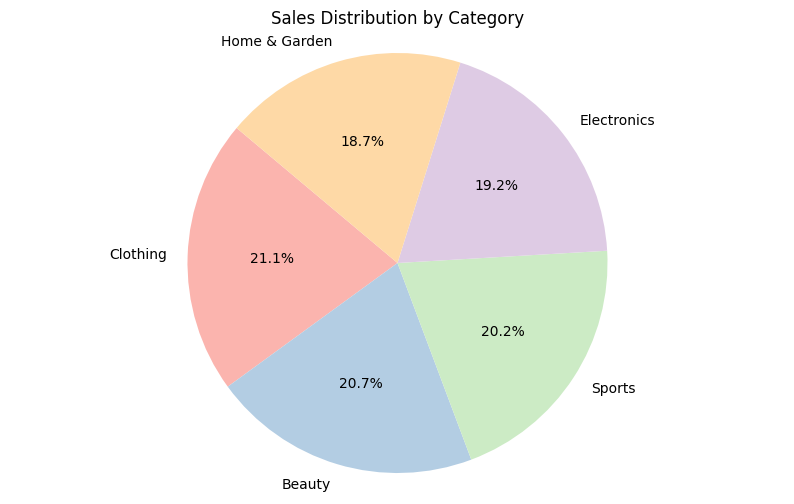

In [13]:
# Example: Pie chart of sales distribution by category
plt.figure(figsize=(10, 6))
plt.pie(category_sales_sorted_by_sales['TotalSale'], labels=category_sales_sorted_by_sales['Category'], autopct='%1.1f%%', startangle=140,colors=plt.cm.Pastel1.colors)
plt.title('Sales Distribution by Category')
plt.axis('equal')
plt.show()


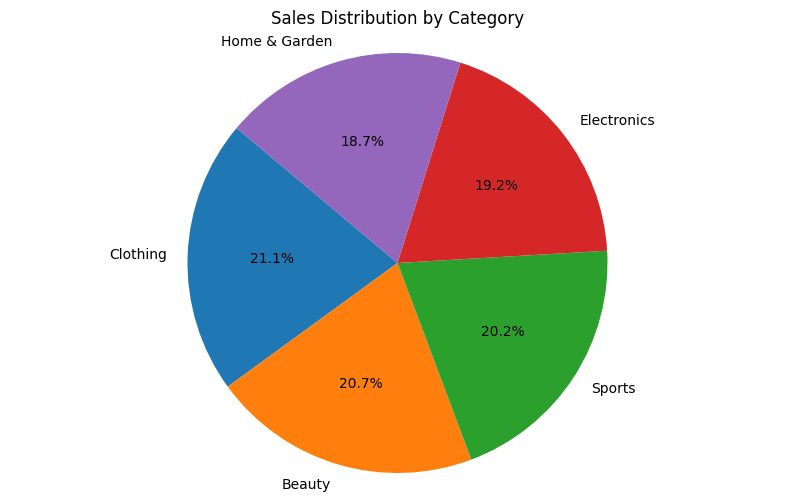

In [14]:
# Example: Pie chart of sales distribution by category
plt.figure(figsize=(10, 6))
plt.pie(category_sales_sorted_by_sales['TotalSale'], labels=category_sales_sorted_by_sales['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Category')
plt.axis('equal')
plt.show()


In [15]:
# Assuming you have already grouped and sorted the product sales data as shown earlier
product_sales = df.groupby(['ProductName']).agg({
    'TotalSale': 'sum',
    'QuantitySold': 'sum'
}).reset_index()

# Example: Top products by total sales
top_products_by_sales = product_sales.sort_values(by='TotalSale', ascending=False)#.head(10)

# Example: Top products by quantity sold
top_products_by_quantity = product_sales.sort_values(by='QuantitySold', ascending=False)# .head(10)

# Display top products by total sales with associated categories in a DataFrame
top_products_sales_df = top_products_by_sales[['ProductName', 'TotalSale']].reset_index(drop=True)
top_products_sales_df.rename(columns={'TotalSale': 'Total Sales'}, inplace=True)
print("Top Products by Total Sales:")
#print(top_products_sales_df)

# Display top products by quantity sold with associated categories in a DataFrame
top_products_quantity_df = top_products_by_quantity[['ProductName', 'QuantitySold']].reset_index(drop=True)
top_products_quantity_df.rename(columns={'QuantitySold': 'Quantity Sold'}, inplace=True)
print("\nTop Products by Quantity Sold:")
#print(top_products_quantity_df)

Top Products by Total Sales:

Top Products by Quantity Sold:


In [16]:
top_products_sales_df["Total Sales"].sum()

np.float64(11513736.0)

In [17]:
top_products_sales_df.iloc[:10]

,ProductName,Total Sales
0,Air Purifier,407152.0
1,Basketball,350727.0
2,Facial Cleanser,334851.0
3,Tablet,315325.0
4,Skirt,313873.0
5,Coffee Maker,302398.0
6,Jeans,295865.0
7,Lipstick,289741.0
8,Gaming Console,287158.0
9,Dumbbells,284741.0


In [18]:
top_10_quantity = top_products_sales_df.iloc[:10]["Total Sales"].sum()
others_quantity = top_products_sales_df["Total Sales"].sum() - top_10_quantity

# Create a new dataframe for the pie chart
top_10_df = top_products_sales_df.iloc[:10].copy()
others_df = pd.DataFrame({'ProductName': ['Others'], 'Total Sales': [others_quantity]})
pie_data = pd.concat([top_10_df, others_df], ignore_index=True)

# Define custom color palette for the top 10 products and "Others"
custom_colors = [
    '#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', 
    '#f95d6a', '#ff7c43', '#ffa600', '#58508d', '#bc5090', 
    'rgba(255, 255, 204, 0.8)'  # Light yellow with transparency for 'Others'
]

# Create the pie chart
fig = px.pie(pie_data, values='Total Sales', names='ProductName', title='Top 10 Products vs Others',
             hover_data=['Total Sales'], labels={'Total Sales': 'Total Sales'},
             color_discrete_sequence=custom_colors)

# Highlight the top 10 products
fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0.2]*10)

# Customize the layout for better visual appeal
fig.update_layout(
    title_font_size=24,
    title_x=0.10,
    title_xanchor='center',
    legend_title_text='Product Name',
    legend_title_font_size=16,
    legend_font_size=14,
    height=1000,  # Increase the height
    width=1050,  # Increase the width
    margin=dict(t=100, b=100, l=100, r=100),  # Adjust margins
)

# Show the pie chart
fig.show()

In [19]:
fig = px.bar(top_products_sales_df.loc[:4], x='ProductName', y='Total Sales', 
             title='Top 3 Products by Total Sales',
             labels={'Total Sales': 'Total Sales', 'ProductName': 'Product Name'})

# Display the chart
fig.show()

In [20]:
# Add Year column to the original DataFrame if not already present
df['Year'] = df['PurchaseDate'].dt.year

# Calculate ASP per category per year
asp_per_year_category = df.groupby(['Year', 'Category']).apply(lambda x: np.round((x['TotalSale'] / x['QuantitySold']).mean(), 2)).reset_index()
asp_per_year_category.columns = ['Year', 'Category', 'ASP']

# Calculate ASP overall per year
asp_per_year_all = df.groupby('Year').apply(lambda x: np.round((x['TotalSale'].sum() / x['QuantitySold'].sum()), 2)).reset_index()
asp_per_year_all.columns = ['Year', 'ASP']

# Add a new 'All' category to the overall ASP DataFrame
asp_per_year_all['Category'] = 'All'

# Concatenate both DataFrames
asp_per_year_combined = pd.concat([asp_per_year_category.sort_values("ASP",ascending=False), asp_per_year_all], ignore_index=True)

# Plotting with Plotly Express using grouped bar charts
fig = px.bar(asp_per_year_combined, x='Year', y='ASP', color='Category',
             title='Average Selling Price (ASP) Evolution by Category Over Years',
             text='ASP',  # Display ASP values as text inside bars
             facet_col='Category', facet_col_wrap=3,  # Facet by Category to create separate bars for each Category
             height=850, width=1400)  # Adjust height and width as needed

# Customize layout
fig.update_layout(xaxis_title='Year',
                  yaxis_title='ASP',
                  legend_title='Category',
                  #legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
                  )

fig.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_8600\3763754099.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\andre\AppData\Local\Temp\ipykernel_8600\3763754099.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [21]:
# Suponiendo que tienes un DataFrame df con datos históricos
# Calcula la cantidad vendida por año por producto
df['Year'] = df['PurchaseDate'].dt.year
sales_by_product_year = df.loc[df.Month <= 9].groupby(['ProductName', 'Year'])['QuantitySold'].sum().reset_index()

# Calcula el crecimiento o caída en las ventas de cada producto
sales_by_product_year['GrowthRate'] = (sales_by_product_year.groupby('ProductName')['QuantitySold']
                                       .pct_change().fillna(0))

# Identifica los productos con mayor crecimiento y caída
products_growth = sales_by_product_year.loc[sales_by_product_year.Year != '2021'].groupby('ProductName')['GrowthRate'].mean().reset_index()
top_growing_products = products_growth.sort_values(by='GrowthRate', ascending=False).head(10)
top_declining_products = products_growth.sort_values(by='GrowthRate').head(10)

# Puedes ahora investigar más sobre estos productos utilizando el DataFrame original df
# por ejemplo, mirando la categoría, el precio, el rating, etc.

# Para identificar categorías con mayores crecimientos o caídas, puedes agrupar por categoría
sales_by_category_year = df.loc[df.Month <= 9].groupby(['Category', 'Year'])['TotalSale'].sum().reset_index()
sales_by_category_year['GrowthRate'] = (sales_by_category_year.groupby('Category')['TotalSale']
                                        .pct_change().fillna(0))

# Identifica las categorías con mayor crecimiento y caída
categories_growth = sales_by_category_year.groupby('Category')['GrowthRate'].sum().reset_index()
top_growing_categories = categories_growth.sort_values(by='GrowthRate', ascending=False).head(5)
top_declining_categories = categories_growth.sort_values(by='GrowthRate').head(5)


In [22]:
sales_by_product_year

,ProductName,Year,QuantitySold,GrowthRate
0,Air Purifier,2022,498,0.000000
1,Air Purifier,2023,136,-0.726908
2,Air Purifier,2024,448,2.294118
3,Badminton Set,2022,548,0.000000
4,Badminton Set,2023,369,-0.326642
...,...,...,...,...
143,Wireless Earbuds,2023,235,13.687500
144,Wireless Earbuds,2024,385,0.638298
145,Yoga Mat,2022,298,0.000000
146,Yoga Mat,2023,417,0.399329


In [23]:
# Assuming you have sales_by_category_year DataFrame already calculated

# Define custom category order
category_order = ['Clothing', 'Sports', 'Beauty', 'Home & Garden', 'Electronics']

# Plotting with Plotly Express
fig = px.line(sales_by_category_year, x='Year', y='GrowthRate', color='Category',
              title='Discount Rate by Category Over Years',
              category_orders={'Category': category_order},  # Set category order
              )

# Manually set line dash for specific categories
for category in ['Home & Garden', 'Electronics', 'Sports']:
    fig.update_traces(selector=dict(name=category), line=dict(dash='dash'))

# Show the plot
fig.show()


In [24]:
# Define custom category order
category_order = ['Clothing', 'Sports', 'Beauty', 'Home & Garden', 'Electronics']

# Plotting with Plotly Express
fig = px.line(sales_by_category_year, x='Year', y='GrowthRate', color='Category',
              title='Discount Rate by Category Over Years',
              category_orders={'Category': category_order},  # Set category order
              )

# Plotting sales by category over years
fig = px.line(sales_by_category_year, x='Year', y='TotalSale', color='Category',
              title='Sales by Category Over Years',
                            category_orders={'Category': category_order}  # Set category order
)

# Manually set line dash for specific categories
for category in ['Home & Garden', 'Electronics','Beauty']:
    fig.update_traces(selector=dict(name=category), line=dict(dash='dash'))

# Update layout to place legend at the bottom horizontally
fig.update_layout(
    legend=dict(
        orientation='h',  # Horizontal orientation
        yanchor='bottom',  # Anchor legend to the bottom
        y=1.02,  # Adjust vertical position
        xanchor='right',  # Anchor legend to the right
        x=1  # Adjust horizontal position
    )
)

# Show the plot
fig.show()

In [25]:
# Plotting with Plotly Express using grouped bar charts
fig = px.line(sales_by_product_year.loc[(sales_by_product_year.ProductName.isin(top_growing_products.iloc[[0,1,2]].ProductName.unique()))], x='Year', y='QuantitySold', color='ProductName',
              title='Sales by Product Over Years',
             text='QuantitySold',  # Display ASP values as text inside bars
             facet_col='ProductName', facet_col_wrap=3,  # Facet by Category to create separate bars for each Category
             height=850, width=1400)  # Adjust height and width as needed

# Customize layout
fig.update_layout(xaxis_title='Year',
                  yaxis_title='ASP', 
                  legend_title='Category',
                  #legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
                  )

fig.show()

In [26]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Data for the first plot
top_growing_df = sales_by_product_year.loc[sales_by_product_year.ProductName.isin(top_growing_products.iloc[[0,1,2]].ProductName.unique())]

# Data for the second plot
top_declining_df = sales_by_product_year.loc[sales_by_product_year.ProductName.isin(top_declining_products[:3].ProductName.unique())]

# Create subplots
fig = make_subplots(rows=2, cols=3, subplot_titles=top_growing_df['ProductName'].unique().tolist() + top_declining_df['ProductName'].unique().tolist())

# Add traces for the first plot
for i, product in enumerate(top_growing_df['ProductName'].unique()):
    product_data = top_growing_df[top_growing_df['ProductName'] == product]
    fig.add_trace(
        go.Scatter(x=product_data['Year'], y=product_data['QuantitySold'], mode='lines+markers+text', text=product_data['QuantitySold'], name=product),
        row=1, col=i+1
    )

# Add traces for the second plot
for i, product in enumerate(top_declining_df['ProductName'].unique()):
    product_data = top_declining_df[top_declining_df['ProductName'] == product]
    fig.add_trace(
        go.Scatter(x=product_data['Year'], y=product_data['QuantitySold'], mode='lines+markers+text', text=product_data['QuantitySold'], name=product),
        row=2, col=i+1
    )

# Update layout
fig.update_layout(height=850, width=1400, title_text="Sales by Product Over Years",
                  xaxis_title='Year', yaxis_title='QuantitySold', legend_title='ProductName')

# Show the figure
fig.show()

In [27]:
# Calculate total sales made during promotions
total_sales_in_promotion = df[df['Promotion'] == 'Yes']['TotalSale'].sum()

# Calculate total sales overall
total_sales = df['TotalSale'].sum()

# Calculate proportion of sales made during promotions
proportion_sales_in_promotion = total_sales_in_promotion / total_sales

print(total_sales_in_promotion)
print(proportion_sales_in_promotion*100)
print(100*len(df[df['Promotion'] == 'Yes'])/len(df))

#Hacerlo en un PIE 

6078830.0
52.79632953196079
51.178451178451176


In [28]:
len(df[df['Promotion'] == 'Yes'])

456

In [29]:
# Filtrar los datos donde hay promoción
product_promotion_count = np.round(100.00*df[df['Promotion'] != 'Yes'].ProductName.value_counts()/df.ProductName.value_counts(),2).sort_values(ascending=False)
category_promotion_count = np.round(100.00*df[df['Promotion'] != 'Yes'].Category.value_counts()/df.Category.value_counts(),2).sort_values(ascending=False)

# Encontrar los productos más y menos promocionados
top_promoted_products = product_promotion_count.head(5)  # Top 5 productos más promocionados
bottom_promoted_products = product_promotion_count.tail(5)  # Top 5 productos menos promocionados

# Encontrar las categorías más y menos promocionadas
top_promoted_categories = category_promotion_count.head(5)  # Top 5 categorías más promocionadas
bottom_promoted_categories = category_promotion_count.tail(5)  # Top 5 categorías menos promocionadas

# Mostrar los resultados
print("Productos más promocionados:")
print(top_promoted_products)
print("\nProductos menos promocionados:")
print(bottom_promoted_products)

print("\nCategorías más promocionadas:")
print(top_promoted_categories)


#Hacerlo en barras el top 3 para todos

Productos más promocionados:
ProductName
Skateboard    71.43
Mascara       66.67
Tablet        66.67
Hair Dryer    64.00
Smartphone    63.16
Name: count, dtype: float64

Productos menos promocionados:
ProductName
Badminton Set    31.82
T-Shirt          30.77
Moisturizer      30.00
Dining Table     26.32
Sweater          22.22
Name: count, dtype: float64

Categorías más promocionadas:
Category
Sports           52.02
Beauty           51.65
Home & Garden    48.59
Clothing         48.04
Electronics      43.89
Name: count, dtype: float64


In [30]:
bottom_promoted_products.reset_index()

,ProductName,count
0,Badminton Set,31.82
1,T-Shirt,30.77
2,Moisturizer,30.00
3,Dining Table,26.32
4,Sweater,22.22


In [31]:
bottom_promoted_products.reset_index().sort_values('count')

,ProductName,count
4,Sweater,22.22
3,Dining Table,26.32
2,Moisturizer,30.00
1,T-Shirt,30.77
0,Badminton Set,31.82


In [32]:
df.groupby('Promotion')['Price'].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
No,435.0,266.124138,131.066656,52.0,154.0,260.0,377.50,499.0
Yes,456.0,275.620614,129.883747,50.0,173.0,269.0,391.25,499.0


In [33]:
df.groupby('Promotion')['QuantitySold'].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
No,435.0,47.577011,28.549503,1.0,23.0,46.0,73.0,99.0
Yes,456.0,48.098684,28.322730,1.0,24.0,48.0,73.0,99.0


In [34]:
df.groupby('Promotion')['Discount'].describe(include='all') # la promocion ayuda mas con un tema de awareness requiriendo menos dct

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
No,435.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Yes,456.0,24.813596,14.408114,0.0,12.0,24.5,37.0,49.0


In [35]:
df.groupby('Promotion')['CustomerAge'].describe(include='all') # la promocion ayuda mas con un tema de awareness requiriendo menos dct

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
No,435.0,40.066667,13.131826,18.0,29.0,39.0,51.0,64.0
Yes,456.0,40.359649,13.312063,18.0,29.0,40.0,52.0,64.0


In [36]:
df.groupby('Promotion')['TotalSale'].describe(include='all') # la promocion ayuda mas con un tema de awareness requiriendo menos dct

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
No,435.0,12494.036782,10430.068341,195.0,4501.0,9443.0,17465.5,47530.0
Yes,456.0,13330.767544,10905.382245,104.0,4492.0,10188.0,19702.0,47405.0


In [37]:
import plotly.subplots as sp

# Supongamos que tu DataFrame se llama df

# Identificar las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns[1:]
# Calcular el número de filas necesarias para los subplots
num_plots = len(numeric_columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Crear subplots
fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numeric_columns)

# Graficar cada columna numérica
for i, col in enumerate(numeric_columns):
    row = i // num_cols + 1
    col_position = i % num_cols + 1
    box_fig = px.box(df, x='Promotion', y=col, color='Promotion')
    for trace in box_fig.data:
        fig.add_trace(trace, row=row, col=col_position)

# Actualizar el layout para hacer el gráfico más bonito
fig.update_layout(
    height=300 * num_rows,  # Ajustar el alto según la cantidad de filas
    showlegend=False,
    title_text='Distribución de Variables Numéricas por Promoción',
    title_x=0.5
)

# Mostrar el gráfico
fig.show()

In [38]:
df['CustomerGender2'] = np.where(df.CustomerGender == 'Male',1,0)

In [39]:
df.columns

Index(['ProductID', 'ProductName', 'Category', 'Price', 'QuantitySold',
       'Promotion', 'Discount', 'Rating', 'CustomerAge', 'CustomerGender',
       'CustomerLocation', 'PurchaseDate', 'TotalSale', 'TotalDiscount',
       'Year', 'Month', 'Year_Month', 'CustomerGender2'],
      dtype='object')

In [40]:
dfa = df.groupby('Category').agg(
            ordenes=('ProductID',lambda x: x.nunique()),
            productos=('ProductName',lambda x: x.nunique()),
            cantidad=('QuantitySold',np.sum),
            rating_mean=('Rating',np.mean),
            edad_prom=('CustomerAge',np.mean),
            sales=('TotalSale',np.sum),
            discounts=('TotalDiscount',np.sum)
).reset_index()

dfa['%dct'] = 100.00*dfa.discounts/dfa.sales
dfa

C:\Users\andre\AppData\Local\Temp\ipykernel_8600\3093284502.py:1: FutureWarning:

The provided callable <function sum at 0x0000019EFAE22CA0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\andre\AppData\Local\Temp\ipykernel_8600\3093284502.py:1: FutureWarning:

The provided callable <function mean at 0x0000019EFAE23D80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



,Category,ordenes,productos,cantidad,rating_mean,edad_prom,sales,discounts,%dct
0,Beauty,182,47,8995,3.457831,40.434066,2382469.0,266887.69,11.202147
1,Clothing,179,50,8668,3.271523,39.385475,2433060.0,338815.41,13.925485
2,Electronics,180,50,8545,3.316129,40.205556,2214011.0,312034.11,14.093612
3,Home & Garden,177,49,7865,3.382550,42.418079,2156383.0,333400.64,15.461105
4,Sports,173,49,8556,3.317568,38.606936,2327813.0,283381.47,12.173721


In [43]:
# Total Sales for Each Category by Gender (with grouping)
total_sales_by_gender = df.groupby(['Category', 'CustomerGender'])['TotalSale'].sum().reset_index().sort_values('Category')
fig1 = px.bar(total_sales_by_gender, x='Category', y='TotalSale', color='CustomerGender', title='Total Sales for Each Category by Gender',
              labels={'TotalSale': 'Total Sales', 'CustomerGender': 'Gender'}, barmode='group',
              color_discrete_map={'Male': 'darkblue', 'Female': 'orange'})
fig1.update_layout(yaxis_tickformat='~s')  # Shorten large numbers
fig1.show()

# Customer Age Distribution for Each Category
fig2 = px.box(df.sort_values('Category'), x='Category', y='CustomerAge', color='Category', title='Customer Age Distribution for Each Category',
              labels={'CustomerAge': 'Customer Age'})
fig2.show()

# Average Rating for Each Category with Text and Colored Bars
average_rating = df.groupby('Category')['Rating'].mean().reset_index()
fig3 = px.bar(average_rating, x='Category', y='Rating', title='Average Rating for Each Category',
              labels={'Rating': 'Average Rating'}, text='Rating', color='Category')
fig3.update_traces(texttemplate='%{text:.2f}', textposition='inside')
fig3.show()

# Total Sales for Each Location by Category (stacked by category, x-axis is location)
total_sales_by_location = df.groupby(['CustomerLocation', 'Category'])['TotalSale'].sum().reset_index()

# Step 1: Calculate the total sales per country
total_sales_by_location['TotalSalesByCountry'] = total_sales_by_location.groupby('CustomerLocation')['TotalSale'].transform('sum')

# Step 2: Sort the DataFrame by the total sales per country
total_sales_by_location = total_sales_by_location.sort_values(by='TotalSalesByCountry', ascending=False).drop('TotalSalesByCountry', axis=1)
fig4 = px.bar(total_sales_by_location, x='CustomerLocation', y='TotalSale', color='Category', title='Total Sales for Each Location by Category',
              labels={'TotalSale': 'Total Sales', 'CustomerLocation': 'Customer Location'}, barmode='stack',
              category_orders={'Category': sorted(df['Category'].unique())})
fig4.update_layout(yaxis_tickformat='~s')  # Shorten large numbers
fig4.show()

In [ ]:
beauty, clothing y electronics representan mas del 50% de las ventas en cada pais a excepcion de italia

SyntaxError: invalid syntax (3011934725.py, line 1)

In [ ]:
# Asegurarse de que PurchaseDate está en formato datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Extraer el año y el mes de PurchaseDate
df['Year'] = df['PurchaseDate'].dt.year
df['Month'] = df['PurchaseDate'].dt.month

# Combinar Año y Mes en una sola columna para agrupamiento
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

# Separar datos en función de la promoción
df_with_promo = df[df['Promotion'] == 'Yes']
df_without_promo = df[df['Promotion'] == 'No']

# Agrupar por Year_Month y calcular la suma de TotalSale, QuantitySold, y TotalDiscount
monthly_sales_total_with_promo = df_with_promo.groupby('Year_Month')['TotalSale'].sum().reset_index()
monthly_sales_total_without_promo = df_without_promo.groupby('Year_Month')['TotalSale'].sum().reset_index()
monthly_sales_quantity_with_promo = df_with_promo.groupby('Year_Month')['QuantitySold'].sum().reset_index()
monthly_sales_quantity_without_promo = df_without_promo.groupby('Year_Month')['QuantitySold'].sum().reset_index()
monthly_sales_discount_with_promo = df_with_promo.groupby('Year_Month')['TotalDiscount'].sum().reset_index()
monthly_sales_discount_without_promo = df_without_promo.groupby('Year_Month')['TotalDiscount'].sum().reset_index()

# Añadir una columna de tipo de promoción para cada DataFrame
monthly_sales_total_with_promo['Promotion'] = 'With Promotion'
monthly_sales_total_without_promo['Promotion'] = 'Without Promotion'
monthly_sales_quantity_with_promo['Promotion'] = 'With Promotion'
monthly_sales_quantity_without_promo['Promotion'] = 'Without Promotion'
monthly_sales_discount_with_promo['Promotion'] = 'With Promotion'
monthly_sales_discount_without_promo['Promotion'] = 'Without Promotion'

# Concatenar los DataFrames de TotalSale, QuantitySold, y TotalDiscount
total_sales_combined = pd.concat([monthly_sales_total_with_promo, monthly_sales_total_without_promo])
quantity_sales_combined = pd.concat([monthly_sales_quantity_with_promo, monthly_sales_quantity_without_promo])
discount_sales_combined = pd.concat([monthly_sales_discount_with_promo, monthly_sales_discount_without_promo])

# Graficar TotalSale
fig_total_sale = px.line(total_sales_combined, x='Year_Month', y='TotalSale', color='Promotion', title='Seasonality of Total Sales by Year and Month', markers=True)
fig_total_sale.update_layout(xaxis_title='Year-Month', yaxis_title='Total Sale', xaxis=dict(tickmode='linear', type='category'))
fig_total_sale.show()

# Graficar QuantitySold
fig_quantity_sold = px.line(quantity_sales_combined, x='Year_Month', y='QuantitySold', color='Promotion', title='Seasonality of Quantity Sold by Year and Month', markers=True)
fig_quantity_sold.update_layout(xaxis_title='Year-Month', yaxis_title='Quantity Sold', xaxis=dict(tickmode='linear', type='category'))
fig_quantity_sold.show()

# Graficar Discount
fig_discount = px.line(discount_sales_combined, x='Year_Month', y='TotalDiscount', color='Promotion', title='Seasonality of Discount by Year and Month', markers=True)
fig_discount.update_layout(xaxis_title='Year-Month', yaxis_title='Total Discount', xaxis=dict(tickmode='linear', type='category'))
fig_discount.show()


# Calcular la proporción de Discount respecto a TotalSale para promociones "Yes"
monthly_discount_ratio_with_promo = monthly_sales_discount_with_promo.copy()
monthly_discount_ratio_with_promo['TotalSale'] = total_sales_combined.groupby("Year_Month")['TotalSale'].sum().reset_index()['TotalSale']
monthly_discount_ratio_with_promo['Discount_Ratio'] = 100.00* monthly_discount_ratio_with_promo['TotalDiscount'] / monthly_discount_ratio_with_promo['TotalSale']

# Graficar la proporción de Discount respecto a TotalSale para promociones "Yes"
fig_discount_ratio = px.line(monthly_discount_ratio_with_promo, x='Year_Month', y='Discount_Ratio', title='Discount to Total Sales Ratio by Year and Month (With Promotion)', markers=True)
fig_discount_ratio.update_layout(xaxis_title='Year-Month', yaxis_title='Discount Ratio', xaxis=dict(tickmode='linear', type='category'))
fig_discount_ratio.show()

In [ ]:
fig_total_sale = px.line(monthly_sales_total, x='Year_Month', y='TotalSale', title='Seasonality of Total Sales by Year and Month', markers=True, color_discrete_sequence=['green'])
fig_total_sale.update_layout(xaxis_title='Year-Month', yaxis_title='Total Sale', xaxis=dict(tickmode='linear', type='category'))
fig_total_sale.show()

In [ ]:
df_g1 =  pd.merge(monthly_discount_ratio_with_promo.loc[monthly_discount_ratio_with_promo.Year_Month.isin(['2023-04','2023-05','2023-06','2023-07','2023-08','2023-09']),['Year_Month','Discount_Ratio']],
                  monthly_sales_total.loc[monthly_sales_total.Year_Month.isin(['2023-04','2023-05','2023-06','2023-07','2023-08','2023-09'])],left_on=['Year_Month'],right_on=['Year_Month'],how='left')

In [ ]:
df_g1

,Year_Month,Discount_Ratio,TotalSale
0,2023-04,9.033217,296172.0
1,2023-05,15.595834,353498.0
2,2023-06,20.425781,370089.0
3,2023-07,17.729086,425848.0
4,2023-08,16.915657,396593.0
5,2023-09,10.632297,339290.0


In [ ]:
# Create scatter plot
fig = px.scatter(df_g1, x='Discount_Ratio', y='TotalSale', 
                 title='Impact of Discount Ratio on Total Sales',
                 hover_name='Year_Month', size='TotalSale', color='Discount_Ratio',
                 labels={'Discount_Ratio': 'Discount Ratio (%)', 'TotalSale': 'Total Sale ($)'},
                 trendline='ols')  # Adds an ordinary least squares regression line

# Customize marker properties
fig.update_traces(marker=dict(symbol='circle', opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))

# Update layout
fig.update_layout(showlegend=False)  # Hide legend if not necessary

# Show the plot
fig.show()

In [ ]:
df_g2 =  pd.merge(monthly_discount_ratio_with_promo.loc[:,['Year_Month','Discount_Ratio']],
                  monthly_sales_total.loc[:],left_on=['Year_Month'],right_on=['Year_Month'],how='left')

In [ ]:
df.TotalDiscount.sum()/df.TotalSale.sum()

np.float64(0.13327727159976568)

In [ ]:
# Create figure
fig = go.Figure()

# Add Total Sale line
fig.add_trace(go.Scatter(x=df_g2['Year_Month'], y=df_g2['TotalSale'], mode='lines+markers', name='Total Sale'))

# Add Discount Ratio line
fig.add_trace(go.Scatter(x=df_g2['Year_Month'], y=df_g2['Discount_Ratio'], mode='lines+markers', name='Discount Ratio', yaxis='y2'))

# Update layout for dual y-axes
fig.update_layout(
    title='Total Sales Over Time with Discount Ratio',
    xaxis=dict(
        title='Year-Month'
    ),
    yaxis=dict(
        title='Total Sale'
    ),
    yaxis2=dict(
        title='Discount Ratio (%)',
        overlaying='y',
        side='right'
    ),
    legend=dict(
        x=0.01,
        y=0.99,
        bgcolor='rgba(255,255,255,0.5)',
        bordercolor='rgba(255,255,255,0.5)'
    )
)

# Show plot
fig.show()

In [ ]:
# Graficar TotalSale
fig_total_sale = px.line(total_sales_combined, x='Year_Month', y='TotalSale', color='Promotion', title='Seasonality of Total Sales by Year and Month', markers=True)
fig_total_sale.update_layout(xaxis_title='Year-Month', yaxis_title='Total Sale', xaxis=dict(tickmode='linear', type='category'))
fig_total_sale.show()

In [ ]:
# Asegurarse de que PurchaseDate está en formato datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Extraer el año y el mes de PurchaseDate
df['Year'] = df['PurchaseDate'].dt.year
df['Month'] = df['PurchaseDate'].dt.month

# Separar datos en función de la promoción
df_with_promo = df[df['Promotion'] != 'a']

# Agrupar por categoría y calcular la suma de TotalSale y Discount
category_sales_discount = df_with_promo.groupby('Category').agg({'TotalSale': 'sum', 'TotalDiscount': 'sum'}).reset_index()

# Calcular el ratio de descuento y el ROI
category_sales_discount['Discount_Ratio'] = 100.00*category_sales_discount['TotalDiscount'] / category_sales_discount['TotalSale']
category_sales_discount['ROI'] = (category_sales_discount['TotalSale'] - category_sales_discount['TotalDiscount']) / category_sales_discount['TotalDiscount']

# Formatear el texto para mostrar dos decimales
category_sales_discount['Discount_Ratio_Text'] = category_sales_discount['Discount_Ratio'].apply(lambda x: f'{x:.2f}')
category_sales_discount['ROI_Text'] = category_sales_discount['ROI'].apply(lambda x: f'{x:.2f}')

# Graficar el ratio de descuento por categoría
fig_discount_ratio = px.bar(category_sales_discount, x='Category', y='Discount_Ratio', title='Discount Ratio by Category',
                            labels={'Discount_Ratio': 'Discount Ratio'}, color='Category',
                            text='Discount_Ratio_Text')
fig_discount_ratio.update_traces(textposition='inside')
fig_discount_ratio.update_layout(xaxis_title='Category', yaxis_title='Discount Ratio', showlegend=True)
fig_discount_ratio.show()

# Graficar el ROI por categoría
fig_roi = px.bar(category_sales_discount, x='Category', y='ROI', title='ROI by Category',
                 labels={'ROI': 'ROI'}, color='Category',
                 text='ROI_Text')
fig_roi.update_traces(textposition='inside')
fig_roi.update_layout(xaxis_title='Category', yaxis_title='ROI', showlegend=True)
fig_roi.show()

## ¿Cómo evalúas la cantidad de ventas con promoción?

Optima. 

Las ventas si aumentan ante la presencia de descuentos (mejor tikect promedio)

- Hay que tener una estrategia clara que entienda al consumidor
- Comunicacion eficaz entre stakeholders
- Datos - mercado - exito hacerlos en flecha

## ¿Las promociones son efectivas?

Si, mejoran las ventas

GRAFICA

entre el 15-20% de dct las ventas mejoran de forma significativa -> hacer zoom de johanna

## ¿Qué relación hay entre ventas y promociones en el negocio?

Hay una relacion directa entre el % de descuento total y las ventas, los 2 picos presentes se ven cuando el % de dct fluctua entre 15 y 20% (quitando estacionalidades .ie. fin de año), adicionalmente, se ve una relacion en el roi con respecto a las mejores categorias, a pesar de que clothing subio bastante el descuento y esto mismo le impacto

#### Grafico de series temporales, graficos de roi

## ¿Qué mejoras propondrías a la mecánica promocional para que sea más efectiva y rentable?

- Segementagcion de promociones 
- Analisis de tendencias del mercado
- Mejora de comunicacion interna (ej. cuidar stock)
- Comunicacion efectiva entre stakeholders
- WISH: gamification -> aumento frecuencia y spend

## ¿De qué información adicional te apalancarías para generar mejores recomendaciones promocionales?

Wish to have:

- Condiciones macroeconomicas

- Margen por product

- Margen por categoria

- Market Basket Analysis

- Penetracion de cada producto

- Top sellers por frecuencia

- Sobre stock, dias de inventario, rotacion promedio

bullets que vayan apareciendo !!

## Propón un timeline y un step by step de como implementarías tus sugerencias, tomando en cuenta los stakeholders más relevantes

Los pasos que se definen a continuacion se deben planear de manera trimestral 

1. Definir estrategia de promociones con planning y marketing  de los productos por categoria* (analisis historico de tendencia de ventas) (celebraciones i.e dia de la mujer, buen fin, etc..)
2. Alinear la estrategia con el equipo de categorias y establecer los KPIs*
3. Definir con finanzas un presupuesto mensual para las promociones a nivel categoria*
4. Establecer el Forecast con demanda y supply con base a la estrategia*  
5. Generacion de campañas con el equipo de comunicaciones(banners, emails, push ups)
6. Revision y seguimiento semanal de los KPIs elavorados por el equpo de BI
7. Comunicar la estrategia final a todos los stakeholders
8. Mostrar resultados


*NOTA
Durante el trimestre se haran ajustes en la estrategia de acuerdo a las condiciones del mercado o por performance, segun sea necesario.